In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display, Math

In [2]:
row_vec = np.array([4, 2])
col_vec = np.array([[-2], [3]])

print(row_vec)
print(col_vec)

[4 2]
[[-2]
 [ 3]]


In [3]:
display(Math(sym.latex(sym.sympify(row_vec))))
display(Math(sym.latex(sym.sympify(col_vec))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

/home/yu/.pyenv/versions/3.6.11/envs/ml_env/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


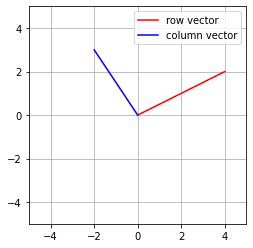

In [4]:
plt.plot([0, row_vec[0]], [0, row_vec[1]], 'r', label='row vector')
plt.plot([0, col_vec[0]], [0, col_vec[1]], 'b', label='column vector')

plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid()
plt.legend()
plt.show()

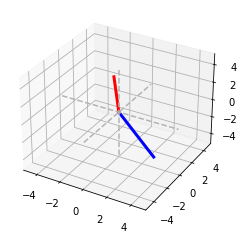

In [5]:
from mpl_toolkits.mplot3d import Axes3D

vec1 = np.array([3, 0, -4])
vec2 = np.array([-1, 1, 3])


fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111, projection='3d')
plt.plot([0, vec1[0]], [0, vec1[1]], [0, vec1[2]], 'b', linewidth=3)
plt.plot([0, vec2[0]], [0, vec2[1]], [0, vec2[2]], 'r', linewidth=3)

ax.plot([-5, 5], [0, 0], [0, 0], '--', color=[.7, .7, .7])
ax.plot([0, 0], [-5, 5], [0, 0], '--', color=[.7, .7, .7])
ax.plot([0, 0], [0, 0], [-5, 5], '--', color=[.7, .7, .7])


ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
plt.show()

### Adding and scalar-multiplying vectors

In [6]:
v = np.array([.5, 1])
s = [1, -.5, 2, .5]

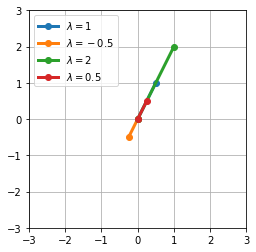

In [7]:
for si in s:
    sv = si*v
    plt.plot([0, sv[0]], [0, sv[1]], 'o-', linewidth=3, label='$\\lambda=%g$' % si)

plt.axis('square')
plt.axis([-3, 3, -3, 3])
plt.grid()
plt.legend()
plt.show()

In [8]:
v1 = np.array([-1, 2])
v2 = np.array([1, 1])

v3a = v1+v2
v3b = np.add(v1, v2)
v3c = np.zeros(2)

for i in range(0, 2):
    v3c[i] = v1[i] + v2[i]

print(v3a, v3b, v3c)

[0 3] [0 3] [0. 3.]


### Exercise - Adding and scalar-multiplying vectors

In [9]:
v1 = np.array([-1, 2])
v2 = np.array([1, 1])
v3 = v1 + v2

<IPython.core.display.Math object>

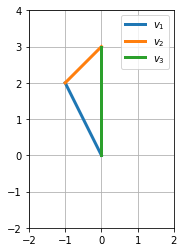

In [10]:
plt.plot([0, v1[0]], [0, v1[1]], linewidth=3, label='$v_1$')
plt.plot([v1[0], v2[0]+v1[0]], [v1[1], v2[1]+v1[1]], linewidth=3, label='$v_2$')
plt.plot([0, v3[0]], [0, v3[1]], linewidth=3, label='$v_3$')

s1 = sym.latex(sym.sympify(v1))
s2 = sym.latex(sym.sympify(v2))
s3 = sym.latex(sym.sympify(v3))
display(Math('%s+%s=%s' % (s1, s2, s3)))

plt.axis('square')
plt.axis([-2, 2, -2, 4])
plt.legend()
plt.grid()
plt.show()

### The dot product

In [11]:
v = np.arange(10, 20, 3)
w = np.arange(5, 15, 3)

print(v)
print(w)

dp1 = 0
for i in range(len(v)):
    dp1 = dp1 + v[i] * w[i]

dp2 = np.sum(np.multiply(v, w))
dp3 = np.dot(v, w)


print(dp1, dp2, dp3)

[10 13 16 19]
[ 5  8 11 14]
596 596 596


### Exercise dot product

In [12]:
def my_dot_product(v, w):

    v = np.squeeze(v)
    w = np.squeeze(w)

    if not len(v) == len(w):
        raise ValueError('Vectors must have the same length')

    display(Math('v^Tw=%g' % np.dot(v, w)))

In [13]:
v1 = np.random.randn(1, 10)
v2 = np.random.randn(1, 10)

my_dot_product(v1, v2)

<IPython.core.display.Math object>

### Dot product application: Correlation coefficient (Statistics)
*Fake Data

| Number of Mike's courses taken | Life Happiness (higher is happier) |
|--------------------------------|------------------------------------|
|                4               |                  6                 |
|                5               |                  7                 |
|                8               |                  9                 |
|                2               |                  3                 |
|                9               |                  9                 |
|                9               |                  3                 |
|                1               |                  1                 |
|                3               |                  6                 |
|                7               |                  7                 |

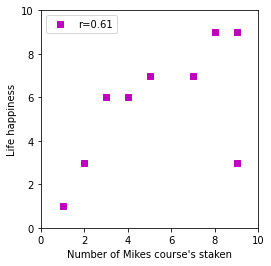

In [14]:
mikes_courses = [4, 5, 8, 2, 9, 9, 1, 3, 7]
life_happiness = [6, 7, 9, 3, 9, 3, 1, 6, 7]

# mean-center
m = mikes_courses - np.mean(mikes_courses)
l = life_happiness - np.mean(life_happiness)

# compute the correlation
numerator = np.dot(m, l)
denominator = np.sqrt(np.dot(m, m)) * np.sqrt(np.dot(l, l))
r1 = numerator/denominator

r2 = np.corrcoef(m, l)

plt.plot(mikes_courses, life_happiness, 'ms', label='r=%g' % np.round(r1, 2))
plt.axis([0, 10, 0, 10])
plt.gca().set_aspect('equal')
plt.xlabel('Number of Mikes course\'s staken')
plt.ylabel('Life happiness')
plt.legend()
plt.show()

### The outer product

In [15]:
import numpy as np
import matplotlib.pyplot as plt

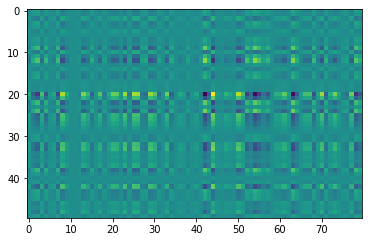

In [16]:
v1 = np.random.randn(50)
v2 = np.random.randn(80)

op = np.outer(v1, v2)
plt.imshow(op)
plt.show()

### The outer product exercise
Test if outer product is matrix commutative 
$$vw = wv$$
Test if outer product is scalar-mult-commutative
$$cvw^T = vcw^T = vw^Tc$$

In [17]:
v = np.arange(1, 11)
w = np.arange(1, 6)


print('Is matrix commutative:', np.array_equal(np.outer(v1, v2), np.outer(v2, v1)))

c = 5

res1 = c*np.outer(v, w)
res2 = np.outer(c*v, w)
res3 = np.outer(v, c*w)
res4 = np.outer(v, w)*c
print(np.array_equal(res1, res2))
print(np.array_equal(res2, res3))
print(np.array_equal(res3, res4))

Is matrix commutative: False
True
True
True


### Matrix multiplication

In [18]:
A = np.random.randn(14, 10)
B = np.random.randn(14, 10)
C = np.random.randn(10, 14)

# 14x10
np.shape(B@C)

(14, 14)

### Matrix multiplication exercise
Write a function that takes two matrcies as input, checks whether multiplication is valid, and returns their product or an error message.

Note: Implement matrix multiplication via dot products of rows and columns; don't use @ operator!

In [19]:
A.shape

(14, 10)

In [20]:
C.shape

(10, 14)

In [21]:
C[:,0]

array([ 0.35926742, -0.07975337,  0.61005778,  0.59732726,  2.15467613,
       -0.28161203, -2.33880481, -1.00437134, -0.9470283 ,  1.21030176])

In [22]:
A[0, :]

array([-1.33370327, -0.96240012,  0.04698072,  0.81908733,  1.26678707,
        0.28467905,  1.03813536, -0.78843618, -1.01671853,  0.83566872])

In [23]:
def custom_mat_mult(v, w):
    # Validation
    v_shape = v.shape
    w_shape = w.shape
    if not v_shape[1] == w_shape[0]:
        raise ValueError('Wrong dimensions')

    res = np.zeros([v_shape[0], w_shape[1]])
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            res[i, j] = np.dot(v[i, :], w[:, j])
    return res
A = np.random.randn(4, 6)
B = np.random.randn(6, 4)

custom_res = custom_mat_mult(A, B)
numpy_res = A@B

custom_res - numpy_res

array([[-2.77555756e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -8.88178420e-16,  2.77555756e-17,
         0.00000000e+00],
       [-2.22044605e-16,  0.00000000e+00,  0.00000000e+00,
         1.66533454e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

### Transposing vectors and matrices


In [24]:
r = np.random.randn(1, 10)

rt1 = np.transpose(r)
rt2 = r.T

print(np.shape(r))
print(np.shape(rt1))
print(np.shape(rt2))

(1, 10)
(10, 1)
(10, 1)


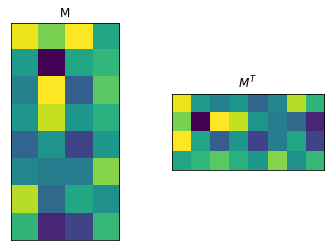

In [25]:
mat = np.random.randn(8, 4)
matT = mat.T

fig, ax = plt.subplots(1, 2)
ax[0].imshow(mat)
ax[0].set_title('M')
ax[1].imshow(matT)
ax[1].set_title('$M^T$')

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

plt.show()

In [26]:
# Symmetric matrices
# A = A^T

m = 4
n = 9

amat = np.random.randn(m, n)

# palindrome
amatama = amat@amat.T

# show that this is square
print(np.shape(amatama))

# show that this is symetric
print( amatama - amatama.T)

(4, 4)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Special Matrices

In [27]:
# identity matrix
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [28]:
# Zero matrix
Z = np.zeros((4, 4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [29]:
# Diagonal matrix

D = np.diag([1, 4, 6, 3, 0])
print(D)

# 
d = np.diagonal(np.random.randn(6, 6))
print(d)

[[1 0 0 0 0]
 [0 4 0 0 0]
 [0 0 6 0 0]
 [0 0 0 3 0]
 [0 0 0 0 0]]
[ 1.44160131 -0.49779732 -1.42800149  0.43244285  0.1199825  -0.46933891]


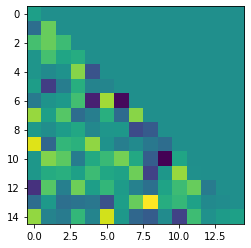

In [30]:
# Triagular matrix
T = np.random.randn(15, 15)

#plt.imshow(np.triu(T))
plt.imshow(np.tril(T))
plt.show()

### Exercise - Special Matrices
1 - Create a 4x4 matrix of random integers between -4 and 4. Multiply this matrix by (1) the identity matrix and (2) by an upper-triangular random-numbers matrix.

2 - Create a Toeplitz matrix and figure out how it is created.

In [31]:
A = np.random.randint(-4, 5, [4, 4])
print(A)
print(A@np.eye(4))
print(A@np.triu(np.random.randn(4, 4)))

[[ 0  3 -2  3]
 [-2 -2  3  4]
 [-1 -2 -2  2]
 [ 0  3  4 -1]]
[[ 0.  3. -2.  3.]
 [-2. -2.  3.  4.]
 [-1. -2. -2.  2.]
 [ 0.  3.  4. -1.]]
[[ 0.         -3.8587924  -1.24402725  1.40109467]
 [-0.98850519  1.59789928 -0.56909872  7.61385493]
 [-0.4942526   2.08521377  3.95165707  6.62873754]
 [ 0.         -3.8587924  -6.74703143 -7.81700293]]


[[1 2 3 4 5]
 [2 1 2 3 4]
 [3 2 1 2 3]
 [4 3 2 1 2]
 [5 4 3 2 1]]


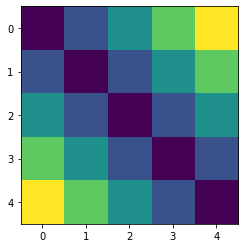

In [32]:
### Toeplitz matrix
from scipy.linalg import toeplitz
toe = toeplitz(np.arange(1, 6))
print(toe)
plt.imshow(toe)

### Matrix inverse

[[ 3  0  0  1 -4]
 [-2 -3 -5  2 -2]
 [ 2  0  4  1 -5]
 [-1 -5  4  3 -4]
 [-2  1 -5  2 -2]]
[[ 4.87654321e-01 -2.02160494e-01 -3.95061728e-01  1.17283951e-01
  -2.00617284e-02]
 [ 2.77555756e-17 -2.50000000e-01 -1.11022302e-16  7.77156117e-17
   2.50000000e-01]
 [-6.17283951e-02 -1.35802469e-01  2.46913580e-02  8.64197531e-02
   2.46913580e-02]
 [ 5.98765432e-01 -7.57716049e-01 -8.39506173e-01  5.61728395e-01
   5.35493827e-01]
 [ 2.65432099e-01 -3.41049383e-01 -5.06172840e-01  2.28395062e-01
   1.18827160e-01]]


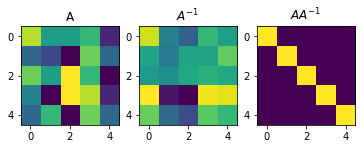

In [33]:
m = 5

A = np.random.randint(-5, 5, (m, m))
# A[:,0] = A[:,1]
print(A)

Ainv = np.linalg.inv(A)
print(Ainv)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(Ainv)
ax[1].set_title('$A^{-1}$')

ax[2].imshow(A@Ainv)
ax[2].set_title('$AA^{-1}$')

plt.show()

### Exercise - Matrix inverse (pseudoinverse)
Pseudoinverse representation: $A^*$

Compute the pseudoinverse and make images of $A$, $A^*$ and $AA^*$ for:

1 - A 5x5 matrix with random integers between -5 and 5, where the first column equals the second column.  
2 - A 5x7 matrix of Gaussian random numbers

Showing that the multiplication is close to Identity (rounding values): 
[[ 0.6  0.4  0.  -0.2 -0.2]
 [ 0.4  0.7 -0.   0.2  0.2]
 [ 0.  -0.   1.   0.   0. ]
 [-0.2  0.2  0.   0.9 -0.1]
 [-0.2  0.2  0.  -0.1  0.9]]


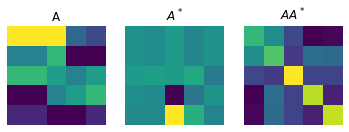

In [34]:
A = np.random.randint(-5, 6, (5, 5))

A[:,1] = A[:,0]
Apinv = np.linalg.pinv(A)

print('Showing that the multiplication is close to Identity (rounding values): ')
print(np.round(A@Apinv, 1))

fig, ax = plt.subplots(1, 3)

ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(Apinv)
ax[1].set_title('$A^*$')

ax[2].imshow(A@Apinv)
ax[2].set_title('$AA^*$')

for i in ax:
    i.axis('off')

Apinv = np.linalg.pinv(A)

Showing that the multiplication is close to Identity (rounding values): 
[[ 1.  0.  0.  0. -0.]
 [-0.  1. -0. -0.  0.]
 [ 0.  0.  1.  0. -0.]
 [ 0. -0. -0.  1.  0.]
 [ 0. -0. -0. -0.  1.]]


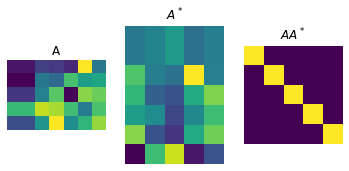

In [35]:
A = np.random.randn(5, 7)

A[:,1] = A[:,0]
Apinv = np.linalg.pinv(A)

print('Showing that the multiplication is close to Identity (rounding values): ')
print(np.round(A@Apinv, 1))

fig, ax = plt.subplots(1, 3)

ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(Apinv)
ax[1].set_title('$A^*$')

ax[2].imshow(A@Apinv)
ax[2].set_title('$AA^*$')

for i in ax:
    i.axis('off')

Apinv = np.linalg.pinv(A)

### Solving a system of equations

In [36]:
X = np.array([[2, 1, -1], [3, 4, 2], [1, -5, -2]])
y = np.array([1, 13, 0])

beta1 = np.linalg.inv(X.T@X) @ (X.T@y)
print(beta1)

beta2 = np.linalg.solve(X, y)
print(beta2)

[ 3. -1.  4.]
[ 3. -1.  4.]


### Exercise - Solve a system of equations

Solution:  [4. 6.]


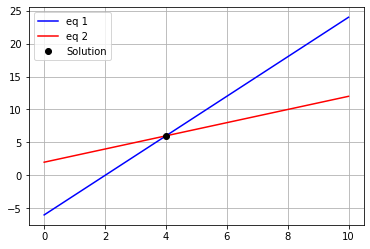

In [37]:
# System 1
X1 = np.array([[3, -1], [-1, 1]])
y1 = np.array([6, 2])

xlim = np.array([0, 10])

yy1 = -X1[0, 0]/X1[0, 1]*xlim + y1[0]/X1[0, 1]
yy2 = -X1[1, 0]/X1[1, 1]*xlim + y1[1]/X1[1, 1]

plt.plot(xlim, yy1, 'b', label='eq 1')
plt.plot(xlim, yy2, 'r', label='eq 2')

s1 = np.linalg.solve(X1, y1)
print('Solution: ', s1)
plt.plot(s1[0], s1[1], 'ko', markersize=6, label='Solution')

plt.legend()
plt.grid()
plt.show()

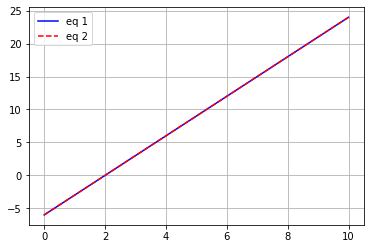

In [38]:
# System 2
X2 = np.array([[3, -1], [1.5, -.5]])
y2 = np.array([6, 3])

xlim = np.array([0, 10])

yy1 = -X2[0, 0]/X2[0, 1]*xlim + y2[0]/X2[0, 1]
yy2 = -X2[1, 0]/X2[1, 1]*xlim + y2[1]/X2[1, 1]

plt.plot(xlim, yy1, 'b', label='eq 1')
plt.plot(xlim, yy2, 'r--', label='eq 2')


#### EQUATIONS ARE ESSENTIALLY THE SAME !!! Can't solve (and it has infinite solutions)
# s2 = np.linalg.solve(X2, y2)
# print('Solution: ', s2)
# plt.plot(s2[0], s2[1], 'ko', markersize=6, label='Solution')

plt.legend()
plt.grid()
plt.show()

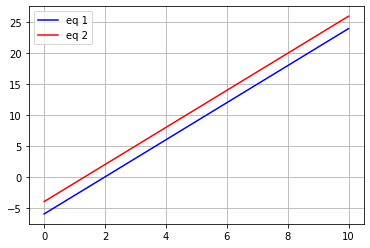

In [39]:
# System 3
X3 = np.array([[3, -1], [1.5, -.5]])
y3 = np.array([6, 2])

xlim = np.array([0, 10])

yy1 = -X3[0, 0]/X3[0, 1]*xlim + y3[0]/X3[0, 1]
yy2 = -X3[1, 0]/X3[1, 1]*xlim + y3[1]/X3[1, 1]

plt.plot(xlim, yy1, 'b', label='eq 1')
plt.plot(xlim, yy2, 'r', label='eq 2')

#### Can't solve !
# s3 = np.linalg.solve(X3, y3)
# print('Solution: ', s3)
# plt.plot(s3[0], s3[1], 'ko', markersize=6, label='Solution')

plt.legend()
plt.grid()
plt.show()

### Visualizing matrix-vector multiplication

[]

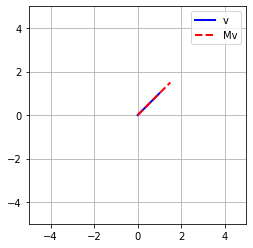

In [40]:
M = np.array([[.5, 1],
              [1, .5]])

V = np.array([1, 1])
# V = np.random.randn(2)

Mv = M@V

plt.plot([0, V[0]], [0, V[1]], 'b', linewidth=2, label='v')
plt.plot([0, Mv[0]], [0, Mv[1]], 'r--', linewidth=2, label='Mv')
plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid()
plt.legend()
plt.plot()

### Exercise - Visualizing matrix-vector multiplication

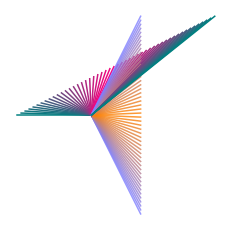

In [41]:
M = np.array([[.5, 1], [1, .5]])

for i in np.linspace(-2, 2, 50):
    v = np.array([1, i])
    Mv = M@v
    plt.plot([0, v[0]], [0, v[1]], color=[1-abs(i)/4, .5, abs(i)/2], alpha=.8)
    plt.plot([0, Mv[0]], [0, Mv[1]], color=[1-abs(i)/2, abs(i)/4, .5])

plt.axis('square')
plt.axis('off')
plt.show()

### Eigenvalues and eigenvectors

[91.76787272  0.43832394  9.99940372 53.37647125 35.41792838]


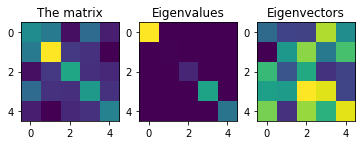

In [42]:
M = np.random.randint(-5, 6, (5, 5))
M = M@M.T

eigvals, eigvecs = np.linalg.eig(M)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(M)
ax[0].set_title('The matrix')

print(eigvals)
ax[1].imshow(np.diag(eigvals))
ax[1].set_title('Eigenvalues')

ax[2].imshow(eigvecs)
ax[2].set_title('Eigenvectors')

plt.show()

In [43]:
Mv = M@eigvecs[:, 0]
lv = eigvals[0]*eigvecs[:, 0]
print(Mv)
print(lv)

[-32.45658875 -79.9418648   12.31115086  -2.65127232  28.61148168]
[-32.45658875 -79.9418648   12.31115086  -2.65127232  28.61148168]


### Exercise eigendecomposition

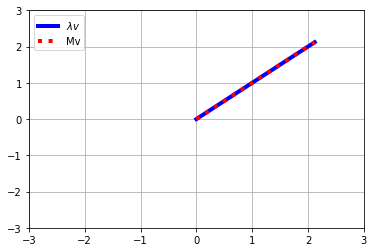

In [44]:
M = np.array([[1, 2], [2, 1]])

eigvals, eigvecs = np.linalg.eig(M)

Mv = M@eigvecs[:, 0]
lv = eigvals[0]*eigvecs[:, 0]

plt.plot([0, lv[0]], [0, lv[1]], 'b', label='$\\lambda v$', linewidth =4)
plt.plot([0, Mv[0]], [0, Mv[1]], 'r:', label='Mv', linewidth=4)

plt.legend()
plt.axis([-3, 3, -3, 3])
plt.grid()
plt.show()

In [45]:
M = np.random.randint(-4, 5, (6, 6))
M = M@M.T

eigvals, eigvecs = np.linalg.eig(M)

Mv = M@eigvecs[:, 0]
lv = eigvals[0]*eigvecs[:, 0]

dps = np.zeros((6, 6))

for i in range(6):
    for j in range(6):
        dps[i, j] = np.dot(eigvecs[:,i], eigvecs[:, j])


print(np.round(dps, 5))

[[ 1. -0. -0.  0.  0.  0.]
 [-0.  1. -0.  0. -0.  0.]
 [-0. -0.  1. -0.  0.  0.]
 [ 0.  0. -0.  1. -0.  0.]
 [ 0. -0.  0. -0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]]
